Optimal THR: 1450000
Route: A -> B -> C -> E
Execution Time: 0.202880 milliseconds
Test with 5 houses completed in 0.05 ms. Optimal THR: 1038061
Test with 10 houses completed in 0.51 ms. Optimal THR: 1814392
Test with 15 houses completed in 3.45 ms. Optimal THR: 2839648
Test with 20 houses completed in 10.53 ms. Optimal THR: 1988765
Test with 25 houses completed in 16.47 ms. Optimal THR: 1562545


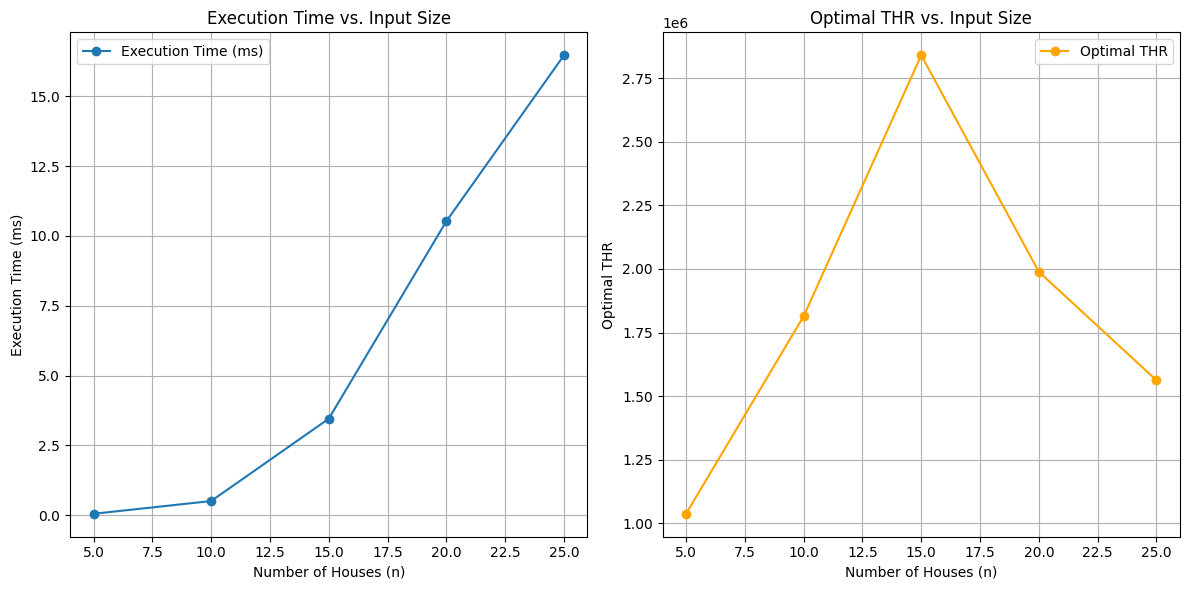

In [15]:
import time
import random
import matplotlib.pyplot as plt

def brute_force_knapsack(W, items):
    n = len(items)
    wt = [item['time'] for item in items]
    val = [item['thr'] for item in items]

    def knapSack(W, wt, val, n):
        if n == 0 or W == 0:
            return {
                'maxProfit': 0,
                'selectedItems': []
            }

        if wt[n - 1] > W:
            return knapSack(W, wt, val, n - 1)

        includeItem = knapSack(W - wt[n - 1], wt, val, n - 1)
        includeItem['maxProfit'] += val[n - 1]
        includeItem['selectedItems'] = includeItem['selectedItems'] + [items[n - 1]]

        excludeItem = knapSack(W, wt, val, n - 1)

        return includeItem if includeItem['maxProfit'] > excludeItem['maxProfit'] else excludeItem

    return knapSack(W, wt, val, n)

# Sample data from the document
houses = [
    {"name": "A", "time": 35, "thr": 250000},
    {"name": "B", "time": 68, "thr": 400000},
    {"name": "C", "time": 84, "thr": 300000},
    {"name": "D", "time": 50, "thr": 180000},
    {"name": "E", "time": 135, "thr": 500000},
    {"name": "F", "time": 86, "thr": 100000}
]

# Maximum time available
max_time = 360 #1 hari ada 1440 menit, secara logika untuk kita dapat meminta THR adalah 6 jam (pagi : 09.00 - 11.00 && sore : 14.00 - 16.00)

# Running the function with execution time measurement
start_time = time.perf_counter()  # Using perf_counter for more precise timing
result = brute_force_knapsack(max_time, houses)
end_time = time.perf_counter()

execution_time = (end_time - start_time) * 1000  # Convert to milliseconds

print("Optimal THR:", result['maxProfit'])
print("Route:", " -> ".join(house['name'] for house in result['selectedItems']))
print(f"Execution Time: {execution_time:.6f} milliseconds")

# Generate random test data
def generate_test_data(n):
    return [
        {"name": f"House-{i+1}", "time": random.randint(10, 200), "thr": random.randint(100000, 500000)}
        for i in range(n)
    ]

# Function to test algorithm with varying input sizes
def test_algorithm(input_sizes, max_time):
    results = []
    for n in input_sizes:
        test_data = generate_test_data(n)
        start_time = time.perf_counter()
        result = brute_force_knapsack(max_time, test_data)
        end_time = time.perf_counter()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        results.append({
            "input_size": n,
            "execution_time": execution_time,
            "optimal_thr": result['maxProfit']
        })
        print(f"Test with {n} houses completed in {execution_time:.2f} ms. Optimal THR: {result['maxProfit']}")
    return results

# Visualize results
def visualize_results(results):
    input_sizes = [result['input_size'] for result in results]
    execution_times = [result['execution_time'] for result in results]
    optimal_thr = [result['optimal_thr'] for result in results]

    # Plot execution time
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(input_sizes, execution_times, marker='o', label="Execution Time (ms)")
    plt.title("Execution Time vs. Input Size")
    plt.xlabel("Number of Houses (n)")
    plt.ylabel("Execution Time (ms)")
    plt.grid()
    plt.legend()

    # Plot optimal THR
    plt.subplot(1, 2, 2)
    plt.plot(input_sizes, optimal_thr, marker='o', color='orange', label="Optimal THR")
    plt.title("Optimal THR vs. Input Size")
    plt.xlabel("Number of Houses (n)")
    plt.ylabel("Optimal THR")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Test configuration
input_sizes = [5, 10, 15, 20, 25]  # Test with 5, 10, 15, ..., 25 houses
max_time = 360  # Max time available for visits

# Run tests and visualize results
results = test_algorithm(input_sizes, max_time)
visualize_results(results)

In [14]:
import time
import random
import matplotlib.pyplot as plt

def brute_force_knapsack(W, items):
    n = len(items)
    wt = [item['time'] for item in items]
    val = [item['thr'] for item in items]

    def knapSack(W, wt, val, n):
        if n == 0 or W == 0:
            return {
                'maxProfit': 0,
                'selectedItems': []
            }

        if wt[n - 1] > W:
            return knapSack(W, wt, val, n - 1)

        includeItem = knapSack(W - wt[n - 1], wt, val, n - 1)
        includeItem['maxProfit'] += val[n - 1]
        includeItem['selectedItems'] = includeItem['selectedItems'] + [items[n - 1]]

        excludeItem = knapSack(W, wt, val, n - 1)

        return includeItem if includeItem['maxProfit'] > excludeItem['maxProfit'] else excludeItem

    return knapSack(W, wt, val, n)

# Sample data from the document
houses = [
    {"name": "A", "time": 35, "thr": 250000},
    {"name": "B", "time": 68, "thr": 400000},
    {"name": "C", "time": 84, "thr": 300000},
    {"name": "D", "time": 50, "thr": 180000},
    {"name": "E", "time": 135, "thr": 500000},
    {"name": "F", "time": 86, "thr": 100000}
]

# Maximum time available
max_time = 360 #1 hari ada 1440 menit, secara logika untuk kita dapat meminta THR adalah 6 jam (pagi : 09.00 - 11.00 && sore : 14.00 - 16.00)

# Running the function with execution time measurement
start_time = time.perf_counter()  # Using perf_counter for more precise timing
result = brute_force_knapsack(max_time, houses)
end_time = time.perf_counter()

execution_time = (end_time - start_time) * 1000  # Convert to milliseconds

print("Optimal THR:", result['maxProfit'])
print("Route:", " -> ".join(house['name'] for house in result['selectedItems']))
print(f"Execution Time: {execution_time:.6f} milliseconds")

# Generate random test data
def generate_test_data(n):
    return [
        {"name": f"House-{i+1}", "time": random.randint(10, 200), "thr": random.randint(100000, 500000)}
        for i in range(n)
    ]

# Function to test algorithm with varying input sizes
def test_algorithm(input_sizes, max_time):
    results = []
    for n in input_sizes:
        test_data = generate_test_data(n)
        start_time = time.perf_counter()
        result = brute_force_knapsack(max_time, test_data)
        end_time = time.perf_counter()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        results.append({
            "input_size": n,
            "execution_time": execution_time,
            "optimal_thr": result['maxProfit']
        })
        print(f"Test with {n} houses completed in {execution_time:.2f} ms. Optimal THR: {result['maxProfit']}")
    return results

# Visualize results
def visualize_results(results):
    input_sizes = [result['input_size'] for result in results]
    execution_times = [result['execution_time'] for result in results]
    optimal_thr = [result['optimal_thr'] for result in results]

    # Plot execution time
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(input_sizes, execution_times, marker='o', label="Execution Time (ms)")
    plt.title("Execution Time vs. Input Size")
    plt.xlabel("Number of Houses (n)")
    plt.ylabel("Execution Time (ms)")
    plt.grid()
    plt.legend()

    # Plot optimal THR
    plt.subplot(1, 2, 2)
    plt.plot(input_sizes, optimal_thr, marker='o', color='orange', label="Optimal THR")
    plt.title("Optimal THR vs. Input Size")
    plt.xlabel("Number of Houses (n)")
    plt.ylabel("Optimal THR")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Test configuration
input_sizes = [5, 100, 150, 200, 250]  # Test with 5, 10, 15, ..., 25 houses
max_time = 360  # Max time available for visits

# Run tests and visualize results
results = test_algorithm(input_sizes, max_time)
visualize_results(results)

Optimal THR: 1450000
Route: A -> B -> C -> E
Execution Time: 0.131103 milliseconds
Test with 5 houses completed in 0.04 ms. Optimal THR: 694515
Test with 100 houses completed in 191383.46 ms. Optimal THR: 4190598


KeyboardInterrupt: 